In [20]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors as NN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression as LR
import matplotlib.pyplot as plt

# Part 1 

In [44]:
# 1. Download and import data
data_set = pd.read_csv("yelp_2k.csv")
data_X = data_set["text"]
label_Y = data_set["stars"]
print(label_Y.head())

0    1
1    5
2    1
3    1
4    5
Name: stars, dtype: int64


In [3]:
# 2. lower case and bag-of-word
vectorizer = CountVectorizer()
BOW = vectorizer.fit_transform(data_X)
# BOW shape: (2000, 13150)

In [4]:
print(vectorizer.get_feature_names())

['00', '000', '00am', '00ish', '00p', '02', '04', '0543', '07', '09', '0s2ahxq4ciqp6wzpyisawg', '10', '100', '1000', '101', '1010958912347118', '109', '10am', '10ish', '10k', '10lb', '10miles', '10min', '10pm', '10th', '11', '110', '1100', '1115', '112', '118', '11am', '11pm', '12', '120', '1200', '120lbs', '12pm', '12th', '13', '130', '130pm', '131', '135', '14', '140', '1400', '145', '148', '149cc', '14th', '15', '150', '1500', '15000', '155', '15am', '15k', '15min', '15minutes', '15pm', '15th', '16', '166', '169', '16th', '17', '170', '1700', '175', '18', '180', '19', '1937', '1950s', '199', '1990s', '19k', '19p', '1am', '1h10min', '1k', '1mb', '1pm', '1st', '20', '200', '2000', '2005', '2008', '2009', '201', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '20min', '20oz', '20th', '21', '210', '2101', '215', '216', '21st', '22', '225', '23', '230', '23rd', '24', '240', '24hour', '24hrlockouts', '24th', '25', '250', '25min', '26', '260', '2600', '270', '274', '278', '

In [5]:
bow_array = np.asarray(BOW)

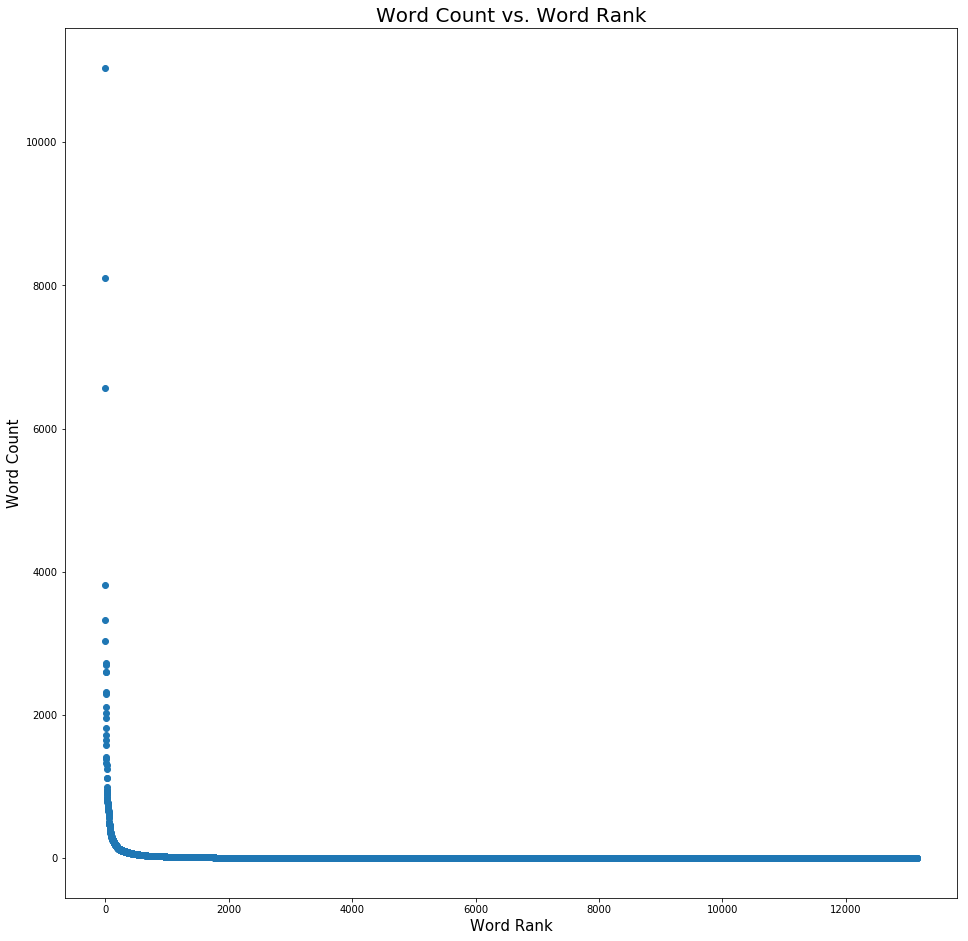

In [6]:
word_count = np.sum(BOW, axis=0)
word_count_list = []
for i in range(13150):
    word_count_list.append(word_count[0, i])
word_count_list.sort(reverse = True)

fig = plt.figure(figsize = (16,16))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Word Rank', fontsize = 15)
ax.set_ylabel('Word Count', fontsize = 15)
ax.set_title('Word Count vs. Word Rank', fontsize = 20)
ax.scatter(np.arange(13150),word_count_list)

In [7]:

stop_word_list = ['00', '000', '00am', '00ish', '00p', '02', '04', '0543', '07', '09', \
                  '0s2ahxq4ciqp6wzpyisawg', '10', '100', '1000', '101', '1010958912347118', \
                  '109', '10am', '10ish', '10k', '10lb', '10miles', '10min', '10pm', '10th', \
                  '11', '110', '1100', '1115', '112', '118', '11am', '11pm', '12', '120', '1200',\
                  '120lbs', '12pm', '12th', '13', '130', '130pm', '131', '135', '14', '140', '1400',\
                  '145', '148', '149cc', '14th', '15', '150', '1500', '15000', '155', '15am', '15k', '15min',\
                  '15minutes', '15pm', '15th', '16', '166', '169', '16th', '17', '170', '1700', '175', '18', '180', \
                  '19', '1937', '1950s', '199', '1990s', '19k', '19p', '1am', '1h10min', '1k', '1mb', '1pm', \
                  '1st', '20', '200', '2000', '2005', '2008', '2009', '201', '2010', '2011', '2012', '2013', '2014',\
                  '2015', '2016', '2017', '20min', '20oz', '20th', '21', '210', '2101', '215', '216', '21st', '22',\
                  '225', '23', '230', '23rd', '24', '240', '24hour', '24hrlockouts', '24th', '25', '250', '25min', '26',\
                  '260', '2600', '270', '274', '278', '27pm', '28', '280', '29', '290', '2900', '295', '299', '29th',\
                  '2am', '2k', '2lb', '2m', '2nd', '2pm', '2x', '30', '300', '3000', '30am', '30min', '30pm', '31', '3151',\
                  '31st', '32', '325', '32nd', '32oz', '33', '330', '33k', '33rd', '34', '342', '35', '350', '35pm', '36',\
                  '363', '365', '37', '375', '38', '385', '39', '3903', '3am', '3d', '3h', '3lb', '3pm', '3rd', '3x', '40',\
                  '400', '4000', '40min', '40mins', '40pm', '42', '43', '430', '45', '450', '45am', '45min', '45pm', '46',\
                  '465', '47', '475', '48', '480', '49', '4963', '49th', '4am', '4d',\
                  '4ish', '4oz', '4pm', '4s', '4th', '4x', '4x4', '4yrs', '50', '500', '5000', '50ish', '50min', '50pm',\
                  '51', '52', '525', '530', '54', '540', '54367742924', '54k', '55', '550', \
                  '561', '57', '58', '59', '595', '599', '5hrs', '5ish', '5mm', '5pm', '5th', \
                  '5yo', '60', '600', '602', '60k', '630', '64', '65', '66', '67', '69', '6am',\
                  '6ish', '6pm', '6th', '6weeks', '70', '700', '702', '705', '70th', '72', '730pm',\
                  '7312', '75', '75th', '7674', '78', '7827', '79', '799', '7am', '7oz', '7pm',\
                  '7th', '80', '800', '81', '8267', '85', '850', '85016', '86', '860ish', '87',\
                  '870', '877', '888', '89', '899', '8am', '8in', '8k', '8oz', '8pm', '8th', '8x',\
                  '90', '900', '90s', '911', '94', '95', '959', '969', '99', '995', '9am', '9k', '9pm', '9yr', \
                  'a', 'a1', 'a4', 'a7', 'aaa', 'also', 'an', 'around', 'at', 'auch', 'being', 'but', 'by',\
                  'cos', 'das', 'der', 'dem', 'den', 'der', 'des', 'did', 'didn', 'didnt', 'eh', 'er', 'eu',\
                  'eta', 'etc', 'ew', 'ewh', 'eww', 'ewww', 'ewwww', 'for', 'had', 'hadn', 'hadnt', 'ha',\
                  'haha', 'hahah', 'hahaha', 'hahahaha',\
                  'he', 'hey', 'hg', 'hh', 'hi','hmm', 'hmmm', 'hmmmm', 'is', 'ie', 'if', 'im', 'ima', 'in',\
                  'ish', 'ist', 'ja', 'it', 'its', 'mma', 'mmmm', 'mmmmmmmm', 'mr', 'mrs', 'ms','oh', 'ohhh',\
                  'ohhhhhh', 'ohjah', 'ohmygod','ooh', 'or', 'ouch', 'out', 'our', 'ours', 'ourselves', 'over',\
                  'rah', 'rd', 're', 'she', 'shes', 'st', 'soo', 'sooo', 'soooo', 'sooooo', 'soooooo', 'still',\
                  'stil', 'sth', 'the', 'then', 'they', 'they', 'tho', 'thus', 'til', 'to', 'today', 'too', 'uh',\
                  'us', 'ur', 'via', 'vs', 'we', 'when', 'where', 'when', 'whenever', 'where', 'whereas',\
                  'whereby', 'wheres', 'wherever', 'whether', 'which', 'whiff', 'while',\
                  'who', 'whoa', 'whoaaaa', 'whoever', 'whom', 'whose', 'why', 'will', 'with',\
                  'wont','yay', 'yayy', 'yea', 'yeah', 'xs', 'xxxx', 'ya', 'yaaaay', 'yet', 'yeyyy',\
                  'you', 'your', 'yours', 'yourself', 'yourselves',\
                  'about', 'are', 'am', 'were', 'of', 'her', 'him', 'his', 'so', 'on', 'after', 'along', 'them', 'there', 'these'\
                  'would', 'wouldn']

max_occurance = 0.2
min_occurance = 0.01

In [8]:
vectorizer_new = CountVectorizer(lowercase=True, stop_words=stop_word_list, max_df=max_occurance, min_df=min_occurance)
BOW_new = vectorizer_new.fit_transform(data_X)

In [9]:
print(len(vectorizer_new.get_feature_names()))

944


In [10]:
print(vectorizer_new.get_feature_names())

['able', 'above', 'absolutely', 'across', 'actually', 'add', 'added', 'affordable', 'afternoon', 'again', 'ago', 'agreed', 'ahead', 'air', 'airport', 'almost', 'alone', 'already', 'although', 'always', 'amazing', 'ambiance', 'amount', 'another', 'answer', 'answered', 'any', 'anymore', 'anyone', 'anything', 'anyway', 'anywhere', 'apology', 'apparently', 'appetizer', 'appointment', 'area', 'aren', 'arrived', 'ask', 'asked', 'asking', 'ate', 'atmosphere', 'attention', 'attentive', 'attitude', 'authentic', 'available', 'average', 'avoid', 'away', 'awesome', 'awful', 'baby', 'bacon', 'bad', 'bar', 'barely', 'bartender', 'bartenders', 'based', 'basic', 'basically', 'bathroom', 'beautiful', 'because', 'beef', 'been', 'beer', 'beers', 'before', 'behind', 'believe', 'best', 'better', 'between', 'beyond', 'big', 'bill', 'birthday', 'bit', 'bite', 'black', 'bland', 'booked', 'both', 'bother', 'bottom', 'bought', 'bowl', 'box', 'boyfriend', 'brand', 'bread', 'breakfast', 'bring', 'broken', 'brough

In [11]:
bow_new_array = np.asarray(BOW_new)

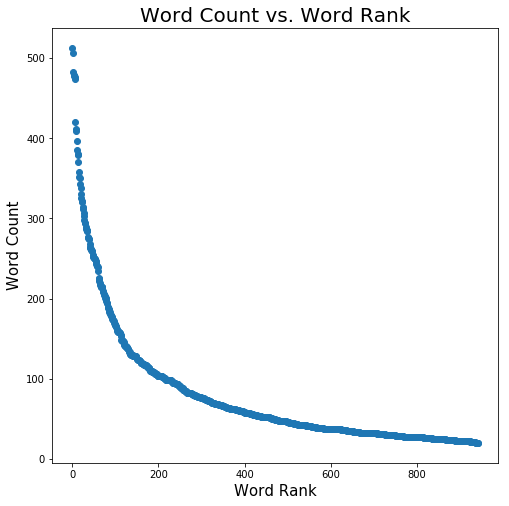

In [202]:
word_count = np.sum(BOW_new, axis=0)
word_count_list = []
for i in range(len(vectorizer_new.get_feature_names())):
    word_count_list.append(word_count[0, i])
word_count_list.sort(reverse = True)

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Word Rank', fontsize = 15)
ax.set_ylabel('Word Count', fontsize = 15)
ax.set_title('Word Count vs. Word Rank', fontsize = 20)
ax.scatter(np.arange(len(vectorizer_new.get_feature_names())),word_count_list)

In [27]:
BOW_new.shape

(2000, 944)

## Part 2

In [14]:
neigh = NN(n_neighbors=5, metric='cosine')
neigh.fit(BOW_new)

NearestNeighbors(algorithm='auto', leaf_size=30, metric='cosine',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [15]:
target_vector = vectorizer_new.transform(['horrible customer service'])

In [16]:
print(target_vector)

  (0, 178)	1
  (0, 380)	1


In [17]:
dist, ind = neigh.kneighbors(target_vector)

In [18]:
for index in ind:
    print(data_X[index])
    print(label_Y[index])
print(dist)


1808    Rogers ...\n\n1) is over priced\n2) have horri...
729     Service was horrible came with a major attitud...
90      Horrible service, horrible customer service, a...
479     HORRIBLE HORRIBLE HORRIBLE!!! AVOID AT ALL COS...
279     Horrible. Absolutely horrible. Seems like they...
Name: text, dtype: object
1808    1
729     1
90      1
479     1
279     1
Name: stars, dtype: int64
[[0.36039785 0.51333574 0.5582739  0.6060807  0.61875357]]


## Part 3

In [183]:
# 1.Split train test data
X_train, X_test, y_train, y_test = train_test_split(BOW_new, label_Y, test_size=0.1)
y_train = np.asarray(y_train)
y_test = np.asarray(y_test)

In [184]:
# 2. Create a classifier based on Logistic Regression
clf = LR(solver = 'lbfgs').fit(X_train, y_train)
pred_train = clf.predict(X_train)
pred_test = clf.predict(X_test)
print(pred_train)
print(pred_test)

[1 5 5 ... 5 1 1]
[5 5 5 1 1 1 1 5 1 1 1 1 5 5 5 1 5 5 1 5 1 1 5 5 5 1 1 1 5 5 1 5 5 1 5 1 1
 1 1 1 5 5 1 5 5 5 1 5 1 5 5 1 5 5 5 5 1 5 5 5 5 1 1 5 5 5 5 5 5 1 1 1 5 1
 1 5 5 1 1 5 1 1 1 5 1 5 5 5 1 5 5 5 5 1 5 1 5 5 5 5 1 1 1 1 1 5 1 1 5 1 5
 5 5 5 1 1 1 1 1 5 1 5 5 5 1 1 1 1 5 5 1 1 1 1 5 5 5 1 5 5 5 1 5 1 1 5 1 1
 1 1 5 5 1 1 1 1 5 1 5 1 1 1 5 5 5 1 5 5 5 1 1 1 1 1 5 1 1 1 5 1 5 5 5 5 1
 5 1 5 1 1 1 1 5 1 5 5 5 1 5 5]


In [185]:
# 3. Accuracy on train data and test data
train_correct = 0
for i in range(len(pred_train)):
    if pred_train[i] == y_train[i]:
        train_correct += 1
print("Accuracy on train data is: ", train_correct / len(pred_train))

test_correct = 0
for i in range(len(pred_test)):
    if pred_test[i] == y_test[i]:
        test_correct += 1
print("Accuracy on test data is: ", test_correct / len(pred_test))

Accuracy on train data is:  0.9944444444444445
Accuracy on test data is:  0.915


In [186]:
# 4. Plot a histogram of the scores on the training data.
pred_prob = clf.predict_proba(X_train)
pos = []
neg = []
for each in pred_prob:
    if each[1] <= 0.5:
        neg.append(each[1])
    else:
        pos.append(each[1])

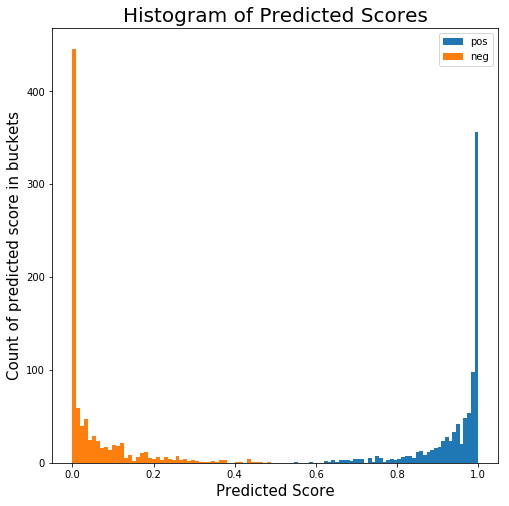

In [201]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Predicted Score', fontsize = 15)
ax.set_ylabel('Count of predicted score in buckets', fontsize = 15)
ax.set_title('Histogram of Predicted Scores', fontsize = 20)
ax.hist(pos, bins = 50)
ax.hist(neg, bins = 50)
plt.legend(['pos', 'neg'])
plt.show()

In [196]:
pred_train_new = clf.predict_proba(X_train)
pred_train_array = []
for i in range(len(pred_train_new)):
    if pred_train_new[i, 1] <= 0.57:
        pred_train_array.append(1)
    else:
        pred_train_array.append(5)
        
train_correct = 0
for i in range(len(pred_train_array)):
    if pred_train_array[i] == y_train[i]:
        train_correct += 1
print("Accuracy on train data is: ", train_correct / len(pred_train_array))

Accuracy on train data is:  0.995


In [197]:
pred_test_new = clf.predict_proba(X_test)
pred_test_array = []
for i in range(len(pred_test_new)):
    if pred_test_new[i, 1] <= 0.57:
        pred_test_array.append(1)
    else:
        pred_test_array.append(5)
        
test_correct = 0
for i in range(len(pred_test_array)):
    if pred_test_array[i] == y_test[i]:
        test_correct += 1
print("Accuracy on test data is: ", test_correct / len(pred_test_array))

Accuracy on test data is:  0.915


It improved a little bit.

In [204]:
from sklearn.metrics import roc_curve, auc

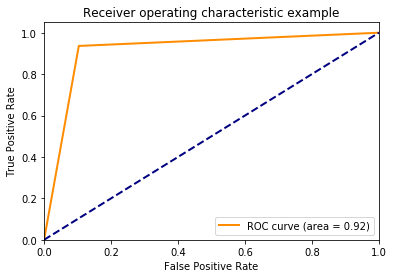

In [207]:
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
#for i in range(2):
#    fpr[i], tpr[i], _ = roc_curve(y_true =y_test[:, i], y_score[:, i], pos_label = 5)
#    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_true = y_test, y_score = pred_test_array, pos_label = 5)
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
lw = 2
plt.plot(fpr["micro"], tpr["micro"], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc["micro"])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()